In [16]:
%matplotlib inline
from qiskit.visualization import plot_histogram
from qiskit import QuantumCircuit
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.transpiler import generate_preset_pass_manager
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import PhaseOracleGate
from qiskit_algorithms import Grover, AmplificationProblem

In [46]:
oracle = PhaseOracleGate('((James & Lars) | (Kirk & Rob)) & ~(Lars & Rob)', var_order=['James', 'Kirk', 'Lars', 'Rob'])
problem = AmplificationProblem(oracle=oracle)

In [47]:
service = QiskitRuntimeService()
backend = service.least_busy(simulator=False, operational=True)

In [48]:
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
sampler = Sampler(mode=backend)
grover = Grover(sampler=sampler, transpiler=pm)
result = grover.amplify(problem)

In [49]:
print(result.circuit_results)

[{'0101': 0.1474609375, '0110': 0.033935546875, '1010': 0.222900390625, '1011': 0.17431640625, '1100': 0.01220703125, '0111': 0.16748046875, '1110': 0.02587890625, '0010': 0.032470703125, '0001': 0.01904296875, '0000': 0.02099609375, '0011': 0.0234375, '0100': 0.02978515625, '1101': 0.021484375, '1000': 0.0283203125, '1001': 0.01953125, '1111': 0.020751953125}]


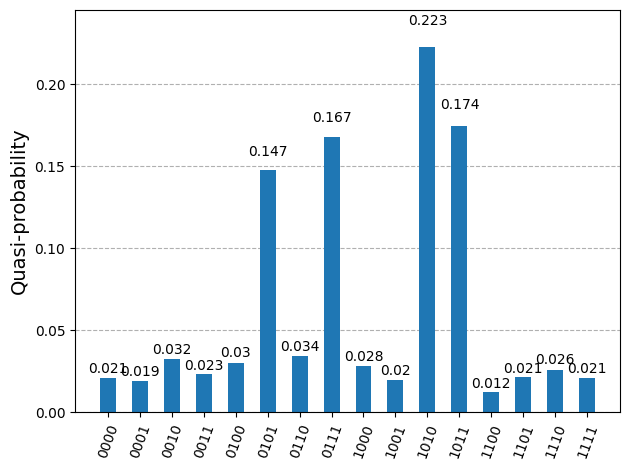

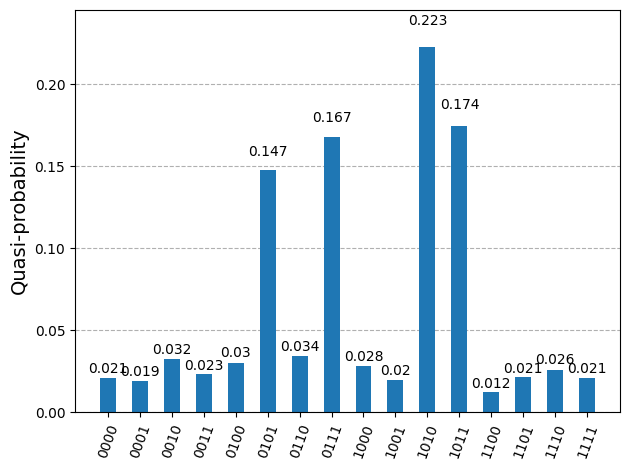

In [50]:
plot_histogram(result.circuit_results[0])

In [ ]:
# order = James - Kirk - Lars - Rob
# James - Lars
# James - Kirk - Lars
# Kirk - Rob
# James - Kirk - Rob

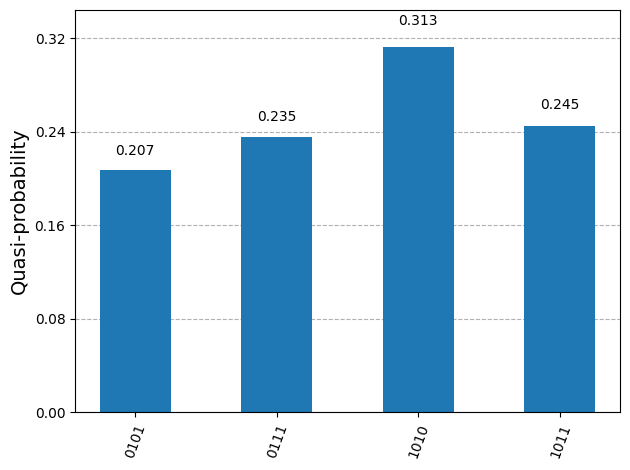

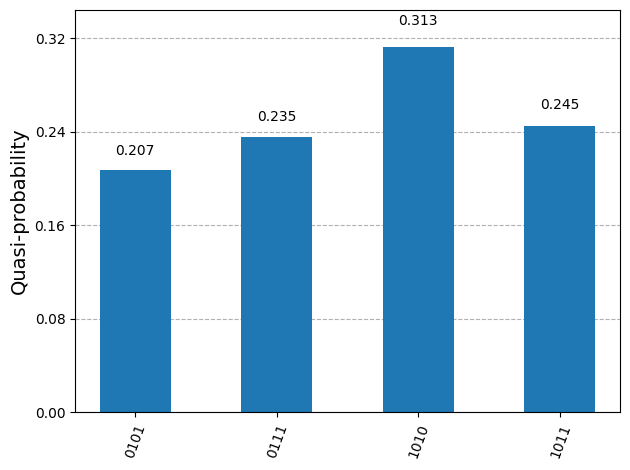

In [54]:
plot_histogram({k:v for k, v in result.circuit_results[0].items() if v > 0.1})

| Index | Binary | Qubit state |
| :---: | :----: | :---------- |
|   0   |   000  | (\| 000⟩) |
|   1   |   001  | (\| 001⟩) |
|   2   |   010  | (\| 010⟩) |
|   3   |   011  | (\| 011⟩) |
|   4   |   100  | (\| 100⟩) |
|   5   |   101  | (\| 101⟩) |
|   6   |   110  | (\| 110⟩) |
|   7   |   111  | (\| 111⟩) |
